 # <center>Lab 6<br>Data Analytics</center>

 <a id='zad1'></a>
 ***Example from the "Bayesian Data Analysis", by Andrew Gelman, John Carlin, Hal Stern, David Dunson, Aki Vehtari, and Donald Rubin: "Estimating the speed of light"***

 Simon Newcomb set up an experiment in 1882 to measure the speed of light. Newcomb measured the amount of time required for light to travel a distance of 7442 meters.

 1. Download the datasets from upel an [load](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.loadtxt.html).

 2. Plot a histogram of Newcomb’s 66 measurements, using [matplotlib.axes.Axes.hist](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html).

 3. Are there unusually low measurements? Are there a cluster of measurements that are approximately symmetrically distributed?


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')



    0
0  28
1  26
2  33
3  24
4  34
5 -44
6  27
7  16
8  40
9  -2


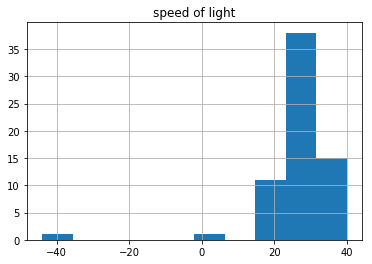

In [2]:
df = pd.read_csv("light.txt", header=None)
print(df.head(10))
df.hist()
plt.title('speed of light')
plt.show()


 ***Apply the normal model***

 The main substantive goal is posterior inference for μ. The outlying
 measurements do not fit the normal model. Apply the normal model, assuming that all 66 measurements are independent draws from a normal distribution with mean $\mu$ and variance $\sigma^2$

 1. Calculate the [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) and the [standard deviation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) of the 66 measurements.

 2. Calculate the [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) and the [standard deviation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) without outlying measurements.

 Assuming the noninformative prior distribution p(μ, σ2) ∝ (σ2)−1, a 95% central posterior interval for μ is obtained from the $t_{65}$ marginal posterior distribution of $\mu$
 The posterior interval can also be obtained by simulation. Following the factorization
 of the posterior distribution given by:
 $$\sigma^2|y ∼ Inv-χ2(n − 1, s^2)$$ and $$\mu|\sigma^2, y ∼ N(y, \sigma^2/n),$$
 we can first draw a random value of $\sigma^2 ∼ Inv-χ2(65, s2)$ as 65s2 divided by a random draw from the χ2.

 1.  For $\mu$, compute the density in points[10, 40]. Use [linspace].
 2. Compute the exact marginal density for $\mu$ multiplication by $\frac{1}{\sqrt{(s2/n)}}$ is due to the transformation of variable $z=\frac{(x-mean)}{\sqrt{(s2/n)}}$. Use [scipy.stats.t.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

 3. Compute the exact marginal density for mu for the filtered data $y>0$.

 4.  Plot the posterior of $\mu$
 5. Plot the posterior of $\mu$ in the filtered case (data $y>0$).

 Incidentally, based on the currently accepted value of the speed of light, the ‘true
 value’ for $\mu$ in Newcomb’s experiment is $33.0$, which falls outside our 95% interval.
 This reinforces the fact that posterior inferences are only as good as the model and
 the experiment that produced the data.


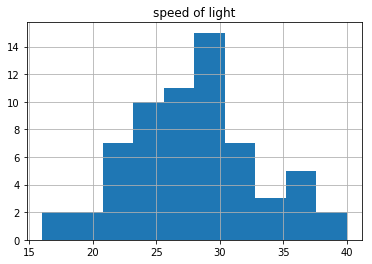

26.21212121212121
115.46200466200466


In [3]:
mean = df.values.mean()
var = np.var(df.values, ddof=1)
std = np.std(df.values, ddof=1)
df_without_outliers = df[df > 0].dropna()
df_without_outliers.hist()
plt.title('speed of light')
plt.show()
print(mean)
print(var)



In [4]:
mean_without_outliers = df_without_outliers.values.mean()
std_without_outliers = np.std(df_without_outliers.values,ddof=1)
var_without_outliers = np.var(df_without_outliers.values,ddof=1)

print(mean_without_outliers)
print(var_without_outliers)
len(df_without_outliers)



27.75
25.841269841269842


64

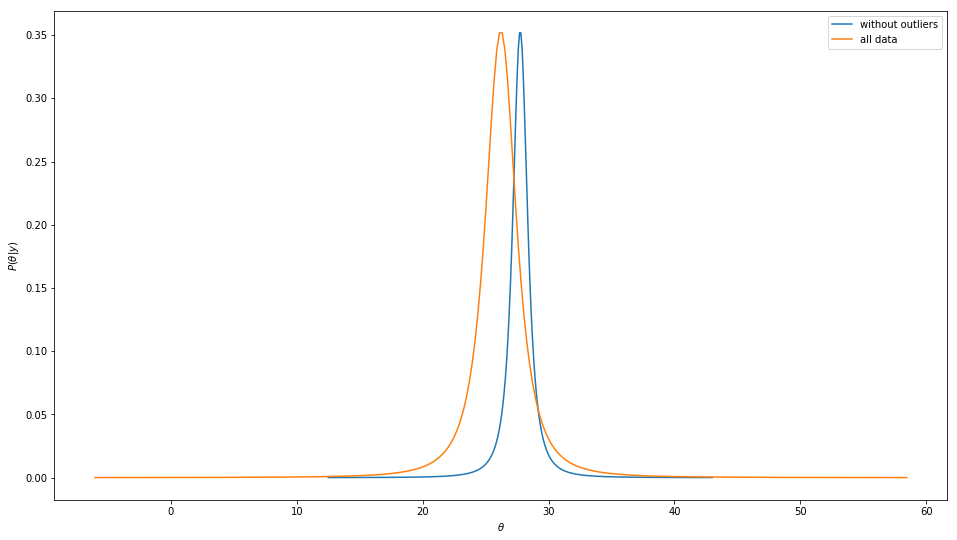

In [5]:
#generate points
from scipy import stats
x_const = np.linspace(10,40,200)
x_without_outliers = np.linspace(mean_without_outliers - 3*std_without_outliers, mean_without_outliers + 3*std_without_outliers, 300)
# x_without_outliers = x_const
len(x_without_outliers)
z_without_outliers = (x_without_outliers - mean_without_outliers)/np.sqrt(var_without_outliers/len(df_without_outliers))
y_without_outliers = stats.t.pdf(z_without_outliers, 2)
plt.figure(figsize=(16,9))
plt.plot(x_without_outliers,y_without_outliers)
x = np.linspace(mean - 3*std, mean + 3*std, 300)
# x = x_const
len(x)
z = (x - mean)/np.sqrt(var/len(df))
y = stats.t.pdf(z, 2)
plt.plot(x,y)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta|y)$')

plt.legend(['without outliers', 'all data'])
plt.show()



In [6]:
print(x_without_outliers[np.argmax(y_without_outliers)])
print(x[np.argmax(y)]) 


27.80100432353591
26.104308588894483


 <a id='zad2'></a>
 ***Example from the "Bayesian Data Analysis", by Andrew Gelman, John Carlin, Hal Stern, David Dunson, Aki Vehtari, and Donald Rubin: "Presidential campaign debate"***
 Comparison of two multinomial observations: on September 25, 1988, the evening of a
 presidential campaign debate, ABC News conducted a survey of registered voters in the
 United States; 639 persons were polled before the debate, and 639 different persons were
 polled after. The results are displayed in Table. Assume the surveys are independent
 simple random samples from the population of registered voters. Model the data with
 two different multinomial distributions. For j = 1, 2, let $\alpha_j$ be the proportion of voters
 who preferred Bush, out of those who had a preference for either Bush or Dukakis at
 the time of survey j. Plot a histogram of the posterior density for $\alpha_2 − \alpha_1$. What is the
 posterior probability that there was a shift toward Bush?
 <table>
   <thead>
     <tr>
         <th>Survey</th>
       <th>Bush</th>
     <th>Dukakis</th>
         <th>No opinion/other</th>
     <th>Total</th>
     </tr>
   </thead>
   <tbody>
     <tr>
       <td>pre-debate</td>
       <td>294</td>
          <td>307</td>
         <td>38</td>
         <td>639</td>
     </tr>
     <tr>
      <td>post-debate</td>
       <td>288</td>
          <td>332</td>
         <td>19</td>
         <td>639</td>
     </tr>
   </tbody>
 </table>

In [7]:
elections = pd.DataFrame(data={'Bush': [294, 288], 'Dukakis': [307, 332], 'No opinion/other': [38, 19], 'Total': [639, 639]})
elections.head()

Bush  Dukakis  No opinion/other  Total
0   294      307                38    639
1   288      332                19    639

 - prior -> dirichlet ($\alpha_1=1,\alpha_2=1,\alpha_3=1$)

 - likelihood -> multinomial

 - posterior -> dirichlet (conjugate to multinomial)

In [14]:
from scipy.stats import dirichlet
alpha_pre = np.array(elections.loc[0][['Bush', 'Dukakis', 'No opinion/other']])
alpha_post = np.array(elections.loc[1][['Bush', 'Dukakis', 'No opinion/other']])

simulated_data_pre = np.random.dirichlet(alpha_pre, 1000).transpose()
marginal_posterior_pre = simulated_data_pre[0] - simulated_data_pre[1]

simulated_data_post = np.random.dirichlet(alpha_post, 1000).transpose()
marginal_posterior_post = simulated_data_post[0] - simulated_data_post[1]

result_marginal = marginal_posterior_post - marginal_posterior_pre

(array([  1.,   8.,  50., 131., 229., 282., 190.,  76.,  26.,   7.]),
 array([-0.24968513, -0.21168857, -0.17369202, -0.13569546, -0.0976989 ,
        -0.05970234, -0.02170579,  0.01629077,  0.05428733,  0.09228389,
         0.13028044]),
 <a list of 10 Patch objects>)

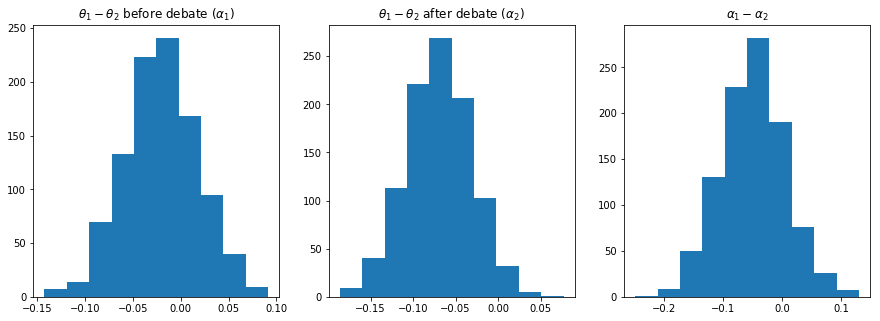

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title(r'$\theta_1 - \theta_2$ before debate $(\alpha_1)$')
plt.hist(marginal_posterior_pre)
plt.subplot(1,3,2)
plt.title(r'$\theta_1 - \theta_2$ after debate $(\alpha_2)$')
plt.hist(marginal_posterior_post)
plt.subplot(1,3,3)
plt.title(r'$\alpha_1 - \alpha_2$')
plt.hist(result_marginal)

In [16]:
np.mean(result_marginal)

-0.049160937813337954

 Materiały uzupełniające:
 - [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
 - [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
 - [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
 - [NumPy](https://www.numpy.org)
 - [Matplotlib](https://matplotlib.org/)
 - [Anaconda](https://www.anaconda.com/)
 - [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
 - [Learn Python](https://www.learnpython.org/)
 - [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)